In [48]:
# imports
from tqdm import tqdm
import timeit
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [4]:
# image dimensions
nx, ny = 3200, 3200
data = np.zeros((nx, ny), dtype=np.uint16)
d = np.random.randint(0, 255, size=(nx, ny), dtype=np.uint16)

In [5]:
%timeit data + d

7.31 ms ± 53.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
# Define the setup and statement for timeit
#image_dims = [2 ** p for p in range(4, 13)]
image_dims = np.arange(32, 4048, 4)
mean_times = []
for n in tqdm(image_dims):
    setup_code = (
        f"import numpy as np\n"
        f"nx, ny = {n}, {n}\n"
        f"data = np.zeros((nx, ny), dtype=np.uint16)\n"
        f"d = np.random.randint(0, 255, size=(nx, ny), dtype=np.uint16)"
    )

    # Define the code you want to time
    stmt_code = "data + d"

    # Use timeit.Timer with repeat
    timer = timeit.Timer(stmt=stmt_code, setup=setup_code)
    times = timer.repeat(repeat=5, number=10)  # Run 5 times, each with 10 additions

    # Analyze results
    times = np.array(times)
    mean_time = times.mean()
    std_time = times.std()
    mean_times.append(mean_time)

100%|██████████████████████████████████████████████████████████████████████████████| 1004/1004 [04:36<00:00,  3.63it/s]


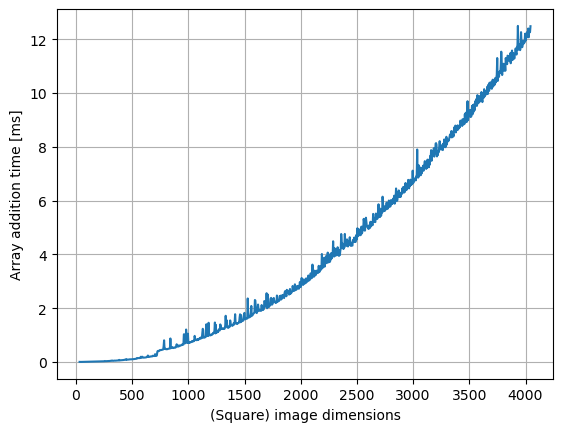

In [15]:
plt.plot(image_dims, np.array(mean_times) * 100) # (ms -> s / number of runs)
plt.grid()
plt.xlabel('(Square) image dimensions')
plt.ylabel('Array addition time [ms]');

In [19]:
from numba import jit
@jit(nopython=True, parallel=True, nogil=False)
def proc(im1, im2):
    im3 = im1 + im2
    return im3
nx, ny = 3200, 3200
data = np.zeros((nx, ny), dtype=np.uint16)
d = np.random.randint(0, 255, size=(nx, ny), dtype=np.uint16)
proc(data, d)

array([[227, 148,  41, ..., 217, 117, 135],
       [185, 131, 253, ..., 221, 157,  36],
       [ 62, 215, 198, ..., 104, 200,  95],
       ...,
       [ 46, 229,  59, ..., 162,  47, 235],
       [ 57, 130, 236, ...,  86,  91,  29],
       [214, 216, 228, ...,  74,  49, 244]], dtype=uint16)

In [31]:
%timeit proc(data, d)

3.21 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
# Define the setup and statement for timeit
image_dims = np.arange(32, 4048, 4)
#image_dims = np.arange(3190, 3210, 4)
median_times = []
for n in tqdm(image_dims):
    setup_code = (
        f"import numpy as np\n"
        f"nx, ny = {n}, {n}\n"
        f"from numba import jit\n"
        f"@jit(nopython=True, parallel=True, nogil=False)\n"
        f"def proc(im1, im2):\n"
        f"    im3 = im1 + im2\n"
        f"    return im3\n"
        f"data = np.zeros((nx, ny), dtype=np.uint16)\n"
        f"d = np.random.randint(0, 255, size=(nx, ny), dtype=np.uint16)\n"
        f"_ = proc(data, d)"
    )

    # Define the code you want to time
    stmt_code = "proc(data, d)"

    # Use timeit.Timer with repeat
    timer = timeit.Timer(stmt=stmt_code, setup=setup_code)
    times = timer.repeat(repeat=5, number=10)  # Run 5 times, each with 10 additions

    # Analyze results
    times = np.array(times)
    med_time = np.median(times)
    median_times.append(med_time)

100%|██████████████████████████████████████████████████████████████████████████████| 1004/1004 [38:33<00:00,  2.30s/it]


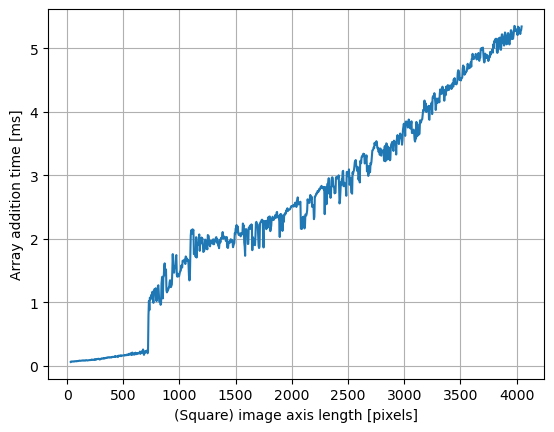

In [47]:
plt.plot(image_dims, np.array(median_times) * 100) # (ms -> s / number of runs)
plt.grid()
plt.xlabel('(Square) image axis length [pixels]')
plt.ylabel('Array addition time [ms]');

In [52]:
def save_numpy_as_fits(numpy_array, filename):
    hdu = fits.PrimaryHDU(numpy_array)
    hdul = fits.HDUList([hdu])
    hdul.writeto(filename, overwrite=True)

nx, ny = 3200, 3200
data = np.zeros((nx, ny), dtype=np.uint16)
d = np.random.randint(0, 255, size=(nx, ny), dtype=np.uint16)
data = data + d
filename = "C:/Users/James/test.fits"
%timeit save_numpy_as_fits(data, filename)

39.7 ms ± 2.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
